In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
landing = pd.read_csv("/Users/lijinpeng/Desktop/MDoyster/data/Oyster/FOSS_landings.csv")
aquaculture = pd.read_csv("/Users/lijinpeng/Desktop/MDoyster/data/Oyster/aquaculture_midatlantic.csv")

In [84]:
# Check data types of all columns
print(landing.dtypes)

Year                int64
State              object
NMFS Name          object
Pounds             object
Metric Tons        object
Dollars            object
Confidentiality    object
Collection         object
Scientific Name    object
Tsn                 int64
Source             object
dtype: object


# 1. analyzed landings data
## 1. Clean the dataset

In [89]:
# strp whitespace from name
landing.columns = landing.columns.str.strip()

In [90]:
# remove commas and convert to numeric
landing['Metric Tons'] = landing['Metric Tons'].str.replace(',', '').astype(float)  
landing['Dollars'] = landing['Dollars'].str.replace(',', '').astype(float)


In [93]:
# Convert all column names to lowercase
landing.columns = (
  landing.columns
  .str.lower()
  .str.strip()  # Remove leading/trailing whitespace
  .str.replace(' ', '_')  # Replace spaces with underscores
  .str.replace('[^a-z0-9_]', '')  # Remove non-alphanumeric characters (except underscore)
  )

In [94]:
print(landing.head())

   year     state        nmfs_name     pounds  metric_tons     dollars  \
0  2023  MARYLAND  OYSTER, EASTERN  1,923,416        872.0  23652717.0   
1  2023  VIRGINIA  OYSTER, EASTERN  4,366,079       1980.0  47765014.0   
2  2022  MARYLAND  OYSTER, EASTERN  1,768,392        802.0  24741846.0   
3  2022  VIRGINIA  OYSTER, EASTERN  4,428,519       2009.0  32204135.0   
4  2021  MARYLAND  OYSTER, EASTERN  1,391,248        631.0  15403761.0   

  confidentiality  collection        scientific_name    tsn source  
0          Public  Commercial  Crassostrea virginica  79872  ACCSP  
1          Public  Commercial  Crassostrea virginica  79872  ACCSP  
2          Public  Commercial  Crassostrea virginica  79872  ACCSP  
3          Public  Commercial  Crassostrea virginica  79872  ACCSP  
4          Public  Commercial  Crassostrea virginica  79872  ACCSP  


## 2.Explore the "nmfs_name"

In [95]:
# View unique values in the NMFS Name column
unique_nmfs_names = landing['nmfs_name'].unique()
print(f"Unique NMFS Names: {unique_nmfs_names}")

# Count the number of unique values
nmfs_name_count = landing['nmfs_name'].nunique()
print(f"Number of unique NMFS Names: {nmfs_name_count}")


Unique NMFS Names: ['OYSTER, EASTERN']
Number of unique NMFS Names: 1


## 3. Analysis

In [100]:
# Group by year and state
grouped_tons = landing_cleaned.groupby(['year','state'])[['metric_tons']].sum().reset_index()
grouped_dollars = landing_cleaned.groupby(['year','state'])[['dollars']].sum().reset_index()

print(grouped_dollars)
print(grouped_tons)

     year     state     dollars
0    1950  MARYLAND   5520892.0
1    1950  VIRGINIA   5573880.0
2    1951  MARYLAND   6692360.0
3    1951  VIRGINIA   5276511.0
4    1952  MARYLAND   7165000.0
..    ...       ...         ...
142  2021  VIRGINIA  30250151.0
143  2022  MARYLAND  24741846.0
144  2022  VIRGINIA  32204135.0
145  2023  MARYLAND  23652717.0
146  2023  VIRGINIA  47765014.0

[147 rows x 3 columns]
     year     state  metric_tons
0    1950  MARYLAND       6535.0
1    1950  VIRGINIA       7052.0
2    1951  MARYLAND       6587.0
3    1951  VIRGINIA       6839.0
4    1952  MARYLAND       7388.0
..    ...       ...          ...
142  2021  VIRGINIA       1648.0
143  2022  MARYLAND        802.0
144  2022  VIRGINIA       2009.0
145  2023  MARYLAND        872.0
146  2023  VIRGINIA       1980.0

[147 rows x 3 columns]


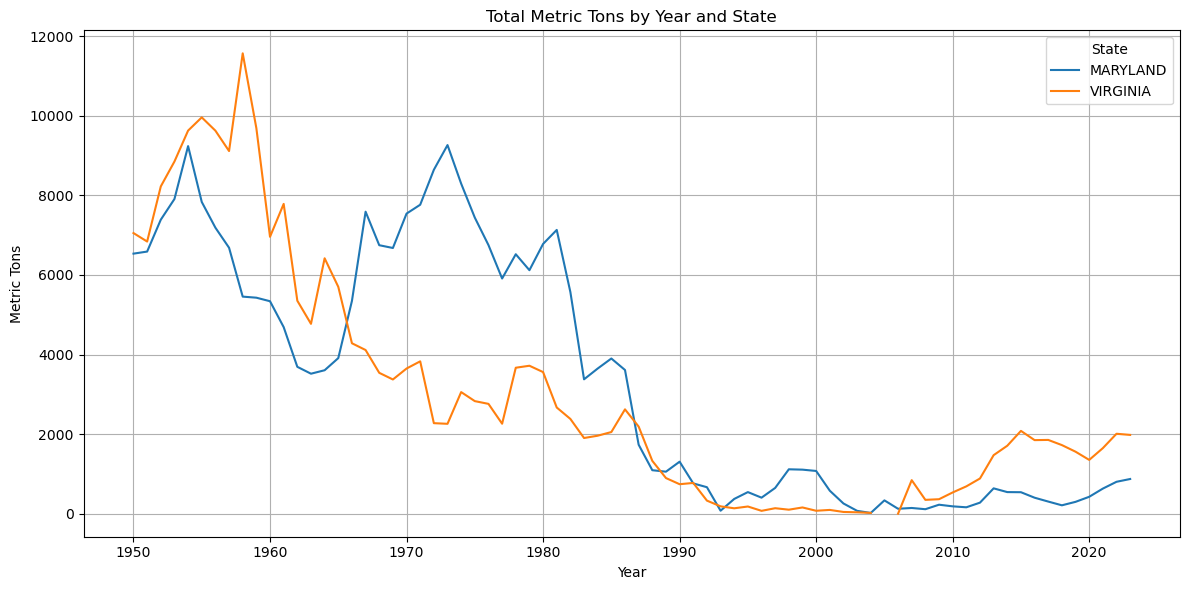

In [97]:
# Pivot data for easier plotting (years as x-axis, states as columns)
pivot_tons = grouped_tons.pivot(index='year', columns='state', values='metric_tons')

# Create the line chart
plt.figure(figsize=(12, 6))

# Plot each state as a separate line
for state in pivot_tons.columns:
    plt.plot(pivot_tons.index, pivot_tons[state], label=state)

# Customize the chart
plt.title('Total Metric Tons by Year and State')
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.legend(title='State')
plt.grid(True)  # Optional: Add grid lines for better readability

# Step 5: Display the chart
plt.tight_layout()
plt.show()

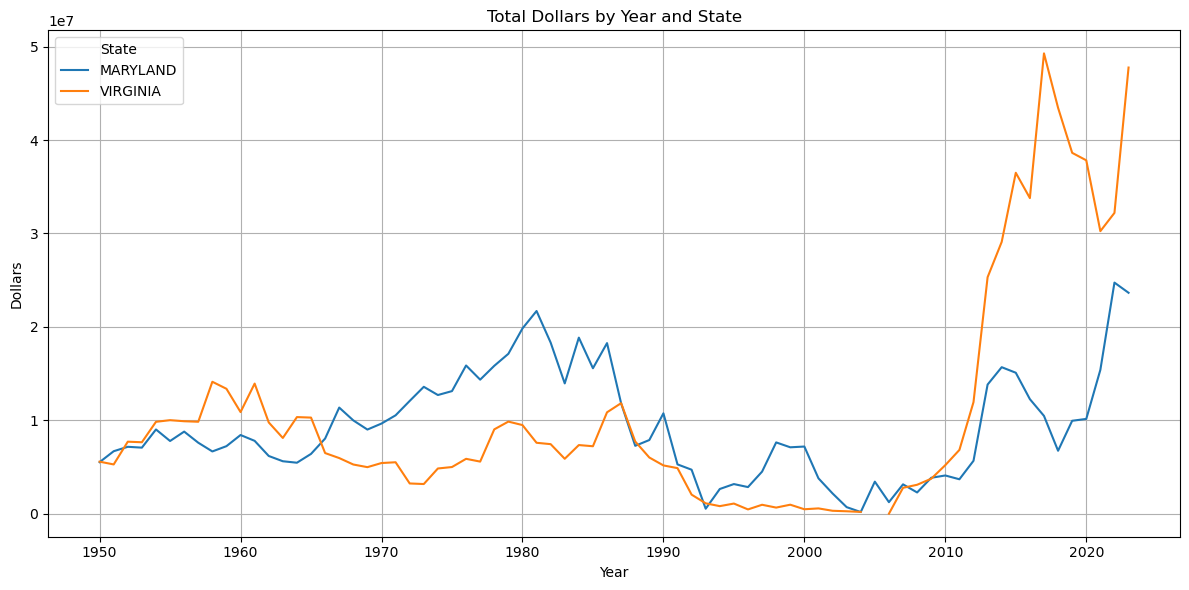

In [82]:
pivot_dollars = grouped_dollars.pivot(index='year',columns='state', values='dollars')

plt.figure(figsize=(12,6))

for state in pivot_dollars.columns:
  plt.plot(pivot_dollars.index, pivot_dollars[state], label=state)

plt.title('Total Dollars by Year and State')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend(title='State')
plt.grid(True)  # Optional: Add grid lines for better readability

# Step 5: Display the chart
plt.tight_layout()
plt.show()

# 2. Analyze aquaculture dara

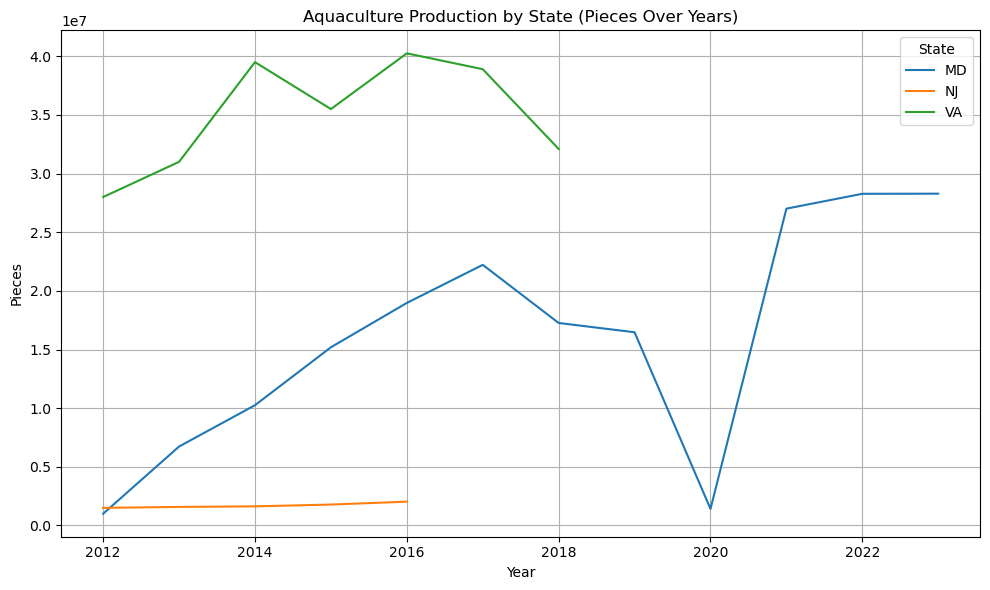

In [99]:

# Step 2: Ensure the column names are cleaned and standardized
aquaculture.columns = (
    aquaculture.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
)

# Step 3: Convert 'pieces' to numeric, removing commas if necessary
aquaculture['pieces'] = aquaculture['pieces'].str.replace(',', '').astype(float)

# Step 4: Pivot the data for plotting
pivot_data = aquaculture.pivot(index='year', columns='state', values='pieces')

# Step 5: Create the line chart
plt.figure(figsize=(10, 6))

# Plot each state as a separate line
for state in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[state], label=state)

# Step 6: Customize the chart
plt.title('Aquaculture Production by State (Pieces Over Years)')
plt.xlabel('Year')
plt.ylabel('Pieces')
plt.legend(title='State')
plt.grid(True)
plt.tight_layout()

# Step 7: Display the chart
plt.show()
